# Approximating the Pareto front of the Schaffer function N. 2<br>
In this notebook it is demonstrated how to use the ask() and tell() interface with a multiobjective optimization problem. 

In this Notebook we will approximate the Pareto front of the Fonseca–Fleming function defined by:
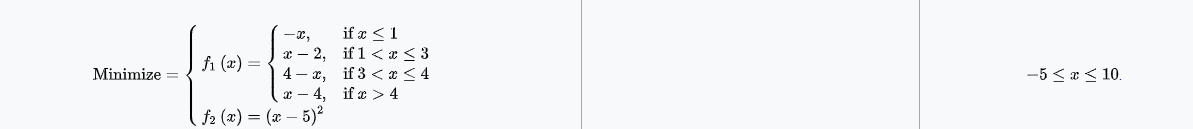

The true Pareto Front (with n=2) looks like this:
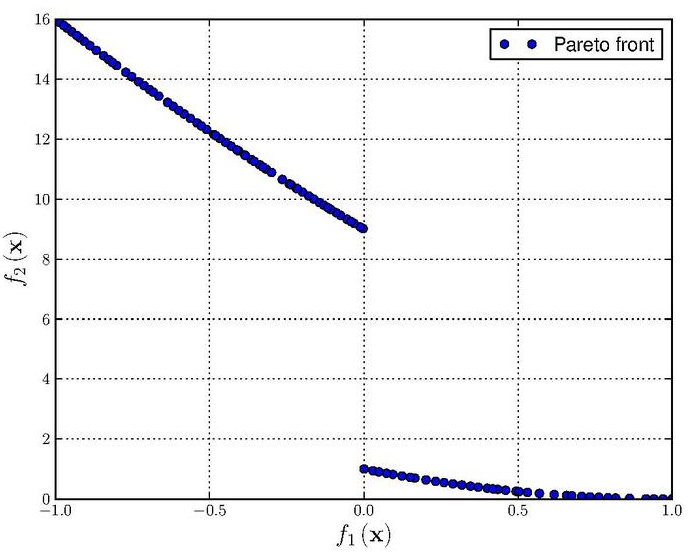

First we define the function:

In [1]:
import numpy as np

def f1(x):
    x=x[0]
    if x <= 1:
        return -x
    if x >1 and x <= 3:
        return x-2
    if x >3 and x <= 4:
        return 4-x
    if x > 4:
        return x-4
        
def f2(x):

    return (x[0]-5)**2

First we initialize an optimizer. Notice that we specify, that there are 2 objectives ( n_objectives=2):

In [2]:
from ProcessOptimizer import Optimizer
import numpy as np
np.random.seed(123)

opt = Optimizer([(-5.0, 10.0)], base_estimator="GP",n_initial_points=10, lhs=True, n_objectives=2,random_state=123)

Next we ask for 25 points. 10 are chosen by LHS. The next 15 are chosen with 25% by Steinerberger sampling (exploration) and with 75% by estimating the Pareto front with the NSGA2 algorithm and then choosing the point in the approximated Pareto front which is the furthest away from previously sampled points (exploitation). The distance is measured in both the parameter and the objective space and a single weigthed measure is combined by the two.

In [3]:
for i in range(25):
    new_point=opt.ask()
    obj1=f1(new_point)
    obj2=f2(new_point)
    obj=[obj1,obj2]
    opt.tell(new_point,obj)

C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result

C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for 

Below the sampled points are shown in both the parameter space (x) and the objective space (f1,f2). Blue points represents samples chosen by LHS and red points are the ones chosen by the Pareto Front procedure

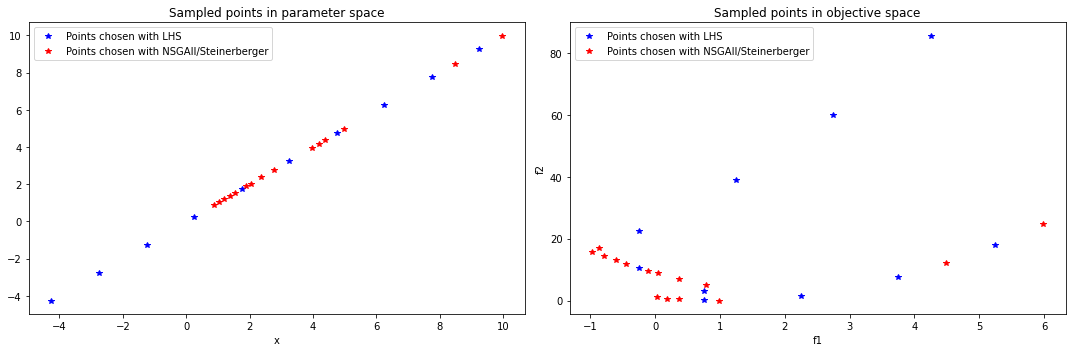

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(np.array(opt.Xi)[0:10,0],np.array(opt.Xi)[0:10,0], 'b*',label="Points chosen with LHS")
axs[0].plot(np.array(opt.Xi)[10:,0],np.array(opt.Xi)[10:,0], 'r*', label = "Points chosen with NSGAII/Steinerberger")
axs[0].set_title('Sampled points in parameter space')
axs[0].set_xlabel('x')
axs[0].legend()

axs[1].plot(np.array(opt.yi)[0:10,0],np.array(opt.yi)[0:10,1], 'b*',label="Points chosen with LHS")
axs[1].plot(np.array(opt.yi)[10:,0],np.array(opt.yi)[10:,1], 'r*', label = "Points chosen with NSGAII/Steinerberger")
axs[1].set_title('Sampled points in objective space')
axs[1].set_xlabel('f1')
axs[1].set_ylabel('f2')
axs[1].legend()


fig.tight_layout()
plt.show()

We can also get an approximation of the Pareto front by calling the NSGA2 algorithm and plotting it in objective space:

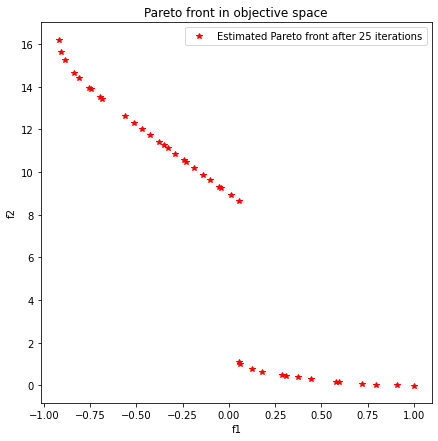

In [5]:
pop, logbook, front = opt.NSGAII()

legend='Estimated Pareto front after ' + str(i + 1) + ' iterations'

fig = plt.figure(figsize=(7,7))
plt.plot(front[:,0],front[:,1], 'r*',label=legend)
plt.title('Pareto front in objective space')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()

Notice that we can get each of these point in the parameter space (ie. their corresponding x value) from the pop object returned by the NSGAII function.

Let us compare the estimated Pareto Front after 25 iterations with the (at least extremely close to) "true" Pareto front estimated after 100 iterations (75 more):

C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\AZOB\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

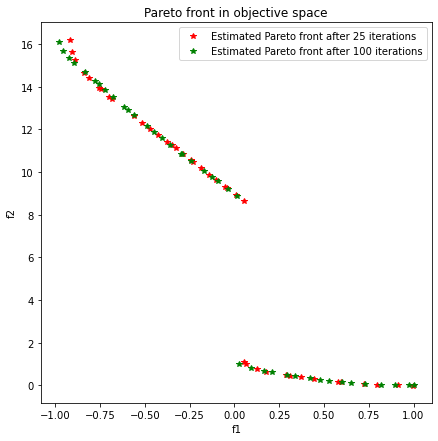

In [6]:
for i in range(75):
    new_point=opt.ask()
    obj1=f1(new_point)
    obj2=f2(new_point)
    obj=[obj1,obj2]
    opt.tell(new_point,obj)

pop, logbook, front_true = opt.NSGAII()

legend2='Estimated Pareto front after ' + str(i + 26) + ' iterations'

fig = plt.figure(figsize=(7,7))
plt.plot(front[:,0],front[:,1], 'r*',label=legend)
plt.plot(front_true[:,0],front_true[:,1], 'g*',label=legend2)
plt.title('Pareto front in objective space')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()